 Multi layer perception 모델 20190704 Dr.전찬준 작성/정유석 활용
  Trainset 과 testset을 이용해서 몇분 후 예측인지 정할 수 있음. 
   입력피처(x)에  예측값(y)을 라벨링 하는 개념.

In [ ]:
import numpy as np
import pandas as pd
import datetime

from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

Using TensorFlow backend.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df_data = pd.read_csv('data.csv')

print(df_data.shape)

(55277, 2)


In [ ]:
df_data.head(10)

,Time,Lux
0,2018-08-10 09:41:37 UTC,527
1,2018-08-10 09:42:26 UTC,942
2,2018-08-10 09:43:16 UTC,942
3,2018-08-10 09:44:04 UTC,942
4,2018-08-10 09:44:53 UTC,942
5,2018-08-10 09:45:41 UTC,941
6,2018-08-10 09:46:31 UTC,951
7,2018-08-10 09:47:19 UTC,951
8,2018-08-10 09:48:08 UTC,951
9,2018-08-10 09:48:57 UTC,951


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55277 entries, 0 to 55276
Data columns (total 2 columns):
Time    55277 non-null object
Lux     55277 non-null int64
dtypes: int64(1), object(1)
memory usage: 863.8+ KB


In [ ]:
df_data['Time'] = pd.to_datetime(df_data['Time'])

In [ ]:
hour, minute, second = [], [], []
for i in range(np.size(df_data, 0)):
    hour.append(df_data['Time'][i].hour)
    minute.append(df_data['Time'][i].minute)
    second.append(df_data['Time'][i].second)

In [ ]:
hour = np.array(hour).reshape(-1, 1)
minute = np.array(minute).reshape(-1, 1)
second = np.array(second).reshape(-1, 1)

print(hour.shape, minute.shape, second.shape)

(55277, 1) (55277, 1) (55277, 1)


In [ ]:
lux = df_data['Lux'].values.reshape(-1, 1)
print(lux.shape)

(55277, 1)


In [ ]:
data = np.concatenate((hour, minute, second, lux), axis=1)
print(data.shape)

(55277, 4)


In [ ]:
#x_train = np.array(data[:40000,:])
#y_train = np.array(data[30:40030,3]).reshape(-1, 1)

#x_test = np.array(data[40001:55277-30,:])
#y_test = np.array(data[40031:,3]).reshape(-1, 1)

#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

x_train = np.array(data[:40000,:])
y_train = np.array(data[15:40015,3]).reshape(-1, 1)

x_test = np.array(data[40001:55277-15,:])
y_test = np.array(data[40016:,3]).reshape(-1, 1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(40000, 4) (40000, 1) (15261, 4) (15261, 1)


In [ ]:
h_units = 128
activation_ = 'relu'

def dnn_model():
    model = Sequential()
    
    model.add(Dense(units=h_units, input_dim=4))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units=h_units))
    model.add(BatchNormalization())
    model.add(Activation(activation_))
    
    model.add(Dense(units=h_units))
    #model.add(BatchNormalization())
    #model.add(Activation(activation_))
    
    model.add(Dense(units=1))

    return model

In [ ]:
model = dnn_model()
model.compile(loss='mse', optimizer='adam')

W0704 08:01:54.089710 140510407972736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 08:01:54.140922 140510407972736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 08:01:54.148124 140510407972736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 08:01:54.270808 140510407972736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0704 08:01:54.418653 

In [ ]:
# training
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, verbose=True, validation_data=(x_test, y_test), shuffle=True)

W0704 08:02:04.982961 140510407972736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 40000 samples, validate on 15261 samples
Epoch 1/50
40000/40000 [==============================] - 2s 56us/step - loss: 499432.6747 - val_loss: 2436991.9901
Epoch 2/50
40000/40000 [==============================] - 1s 26us/step - loss: 16417.2329 - val_loss: 106387.4877
Epoch 3/50
40000/40000 [==============================] - 1s 25us/step - loss: 6476.3584 - val_loss: 81199.9729
Epoch 4/50
40000/40000 [==============================] - 1s 26us/step - loss: 6020.2371 - val_loss: 35078.2236
Epoch 5/50
40000/40000 [==============================] - 1s 26us/step - loss: 5944.3249 - val_loss: 48691.1811
Epoch 6/50
40000/40000 [==============================] - 1s 26us/step - loss: 5990.9464 - val_loss: 36432.6106
Epoch 7/50
40000/40000 [==============================] - 1s 26us/step - loss: 5833.1638 - val_loss: 24645.7145
Epoch 8/50
40000/40000 [==============================] - 1s 25us/step - loss: 5693.4105 - val_loss: 38210.0090
Epoch 9/50
40000/40000 [========================

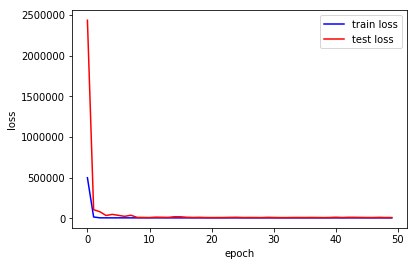

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

In [ ]:
y_pred = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


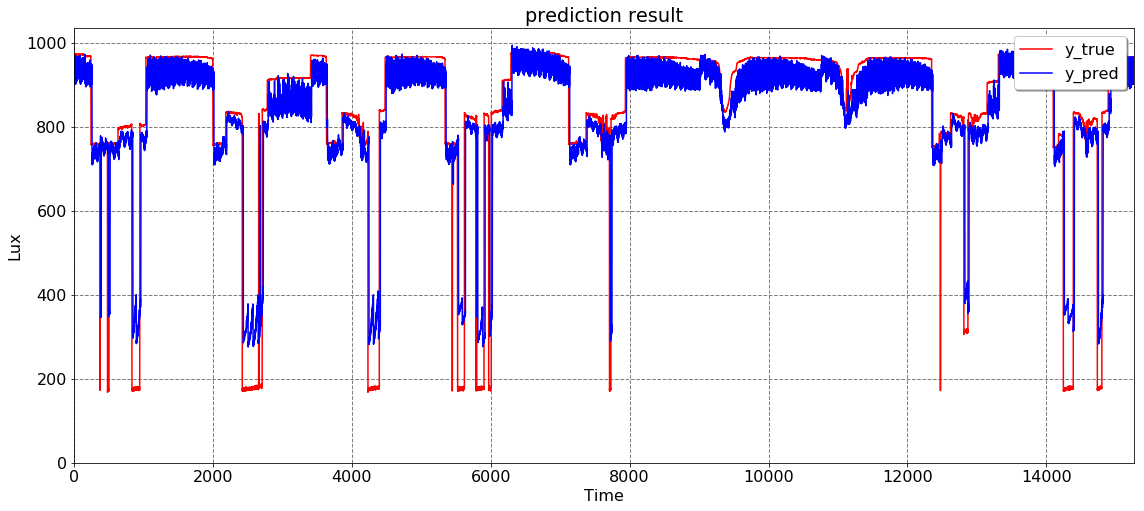

In [ ]:
# visualization for prediction result
# set figure size
plt.figure(figsize=(19,8))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data 
plt.plot(y_test, 'r', label='y_true')
plt.plot(y_pred, 'b', label='y_pred')

# set legend position
plt.legend(shadow=True, loc='upper right')

# set x-axis & y-axis titles
plt.title('prediction result')
plt.xlabel('Time')
plt.ylabel('Lux')

# set axis-limits
plt.xlim(left = 0, right = len(y_test)) 
plt.ylim(bottom = 0) 

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

# save & display figure
plt.savefig('prediction_result.png')
plt.show()

In [ ]:
#모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: ', trainScore)
#valScore = model.evaluate(x_val, y_val, verbose=0)
#print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: ', testScore)

Train Score:  6623.330253649902
Test Score:  10181.295462748629


In [ ]:
#MAPE

y_test, y_pred = np.array(y_test), np.array(y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE: ', mape)

MAPE:  13.730584908356755
